In [264]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import nengo
from nengo.utils.matplotlib import rasterplot

In [19]:
import sys
sys.path.append('/Users/samart/Desktop/Neuro/SNNs/assemblies')

In [20]:
import brain

## Assembly Creation in NEMO

In [160]:
N = 1000
k = 10
beta = 0.05
p = 0.01 


In [72]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

### Creating Stimulus Assembly into A

In [74]:
t = 5
for i in range(t-1):
    nemo.project({'STIM':["A"]}, {}, verbose=2)

Projecting STIM  and  into A
prev_winner_inputs: [1. 0. 0. ... 0. 2. 0.]
new_winners: [6138, 5448, 9960, 530, 2305, 2640, 3217, 3390, 3416, 3587, 3913, 3928, 6376, 6528, 6756, 6983, 7082, 8665, 9980, 26, 77, 171, 239, 252, 308, 349, 405, 736, 745, 762, 799, 812, 1132, 1287, 1329, 1378, 1395, 1422, 1454, 1462, 1709, 1753, 1878, 1919, 1921, 2065, 2123, 2140, 2214, 2283]
STIM now looks like: 
[1. 0. 0. ... 0. 2. 0.]
Connectome of 'A' to 'A' is now: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Connectome of 'A' to 'B' is now: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Projecting STIM  and  into A
prev_winner_inputs: [1. 0. 0. ... 0. 2. 0.]
new_winners: [6138, 5448, 9960, 530, 2305, 2640, 3217, 3390, 3416, 3587, 3913, 3928, 6376, 6528, 6756, 6983, 7082, 8665, 9980, 26, 7

In [63]:
Wsa = nemo.connectomes_by_stimulus['STIM']['A']

Wsa

array([1., 0., 0., ..., 0., 2., 0.], dtype=float32)

In [64]:
Wsa[assembly]

array([9.30797  , 7.756641 , 7.756641 , 6.2053127, 6.2053127, 6.2053127,
       6.2053127, 6.2053127, 6.2053127, 6.2053127, 6.2053127, 6.2053127,
       6.2053127, 6.2053127, 6.2053127, 6.2053127, 6.2053127, 6.2053127,
       6.2053127, 4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 ,
       4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 ,
       4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 ,
       4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 ,
       4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 , 4.653985 ,
       4.653985 , 4.653985 ], dtype=float32)

In [70]:
asdf = 0
for i in np.argsort(Wsa)[-50:]:
    asdf += int(i not in assembly)
asdf

0

In [68]:
assembly

[6138,
 5448,
 9960,
 530,
 2305,
 2640,
 3217,
 3390,
 3416,
 3587,
 3913,
 3928,
 6376,
 6528,
 6756,
 6983,
 7082,
 8665,
 9980,
 26,
 77,
 171,
 239,
 252,
 308,
 349,
 405,
 736,
 745,
 762,
 799,
 812,
 1132,
 1287,
 1329,
 1378,
 1395,
 1422,
 1454,
 1462,
 1709,
 1753,
 1878,
 1919,
 1921,
 2065,
 2123,
 2140,
 2214,
 2283]

In [61]:
np.array(nemo.area_by_name['A'].saved_winners[0]) == assembly

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [60]:
nemo.area_by_name['A'].saved_winners[0])

list

In [41]:
for t, winners in enumerate(nemo.area_by_name['A'].saved_winners):
    print(f"At time {t+1}, winners were {winners}.\n\n")

At time 1, winners were [6138, 5448, 9960, 530, 2305, 2640, 3217, 3390, 3416, 3587, 3913, 3928, 6376, 6528, 6756, 6983, 7082, 8665, 9980, 26, 77, 171, 239, 252, 308, 349, 405, 736, 745, 762, 799, 812, 1132, 1287, 1329, 1378, 1395, 1422, 1454, 1462, 1709, 1753, 1878, 1919, 1921, 2065, 2123, 2140, 2214, 2283].


At time 2, winners were [6138, 5448, 9960, 530, 2305, 2640, 3217, 3390, 3416, 3587, 3913, 3928, 6376, 6528, 6756, 6983, 7082, 8665, 9980, 26, 77, 171, 239, 252, 308, 349, 405, 736, 745, 762, 799, 812, 1132, 1287, 1329, 1378, 1395, 1422, 1454, 1462, 1709, 1753, 1878, 1919, 1921, 2065, 2123, 2140, 2214, 2283].


At time 3, winners were [6138, 5448, 9960, 530, 2305, 2640, 3217, 3390, 3416, 3587, 3913, 3928, 6376, 6528, 6756, 6983, 7082, 8665, 9980, 26, 77, 171, 239, 252, 308, 349, 405, 736, 745, 762, 799, 812, 1132, 1287, 1329, 1378, 1395, 1422, 1454, 1462, 1709, 1753, 1878, 1919, 1921, 2065, 2123, 2140, 2214, 2283].


At time 4, winners were [6138, 5448, 9960, 530, 2305, 2640, 3217

In [55]:
def d(a1, a2):
    return np.sum(np.array(a1) != np.array(a2))

diff = []
assembly = nemo.area_by_name['A'].saved_winners[-1]
for a in nemo.area_by_name['A'].saved_winners:
    diff.append(d(a, assembly))

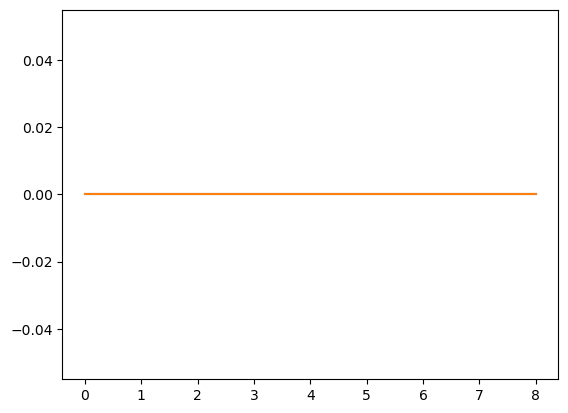

In [57]:
plt.plot(diff)
plt.show()

### Projecting assembly into B as well 

In [81]:
N = 10000
k = 50
beta = 0.05
p = 0.01 

In [82]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

In [83]:
t = 5
for i in range(t):
    nemo.project({'STIM':["A"]}, {})
    if(t > 0):
        nemo.project({'STIM':["A"]}, {"A":["B"]})

In [84]:
sA = np.array(nemo.area_by_name['A'].winners)
sB = np.array(nemo.area_by_name['B'].winners)

In [169]:
def diff(a, b):
    # Count occurrences of each element in both arrays
    count1 = collections.Counter(a)
    count2 = collections.Counter(b)
    # Calculate the difference in counts for each unique element
    total_diff = 0
    all_keys = set(count1.keys()).union(count2.keys())
    for key in all_keys:
        total_diff += abs(count1[key] - count2[key])
    
    return total_diff

In [92]:
for wA in nemo.area_by_name['A'].saved_winners:
    print(similar(wA, sA))

0
0
0
0
0
0
0
0
0
0


In [93]:
for wB in nemo.area_by_name['B'].saved_winners:
    print(similar(wB, sB))

0
0
0
0
0


## Recreating Assembly Projection in Nengo

In [110]:
import nengo
from nengo.dists import Uniform, ScatteredHypersphere
from nengo.processes import WhiteSignal
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot


In [212]:
N = 100
k = 5
beta = 0.05
p = 0.01 


In [213]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

t = 3
for i in range(t):
    nemo.project({'STIM':["A"]}, {}, verbose=1)
    if(t > 0):
        nemo.project({'STIM':["A"]}, {"A":["B"]}, verbose=1)

Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B


In [214]:
sA = np.array(nemo.area_by_name['A'].winners)
sB = np.array(nemo.area_by_name['B'].winners)

In [215]:
for wA in nemo.area_by_name['A'].saved_winners:
    print(diff(wA, sA))

0
0
0
0
0
0


In [216]:
for wB in nemo.area_by_name['B'].saved_winners:
    print(diff(wB, sB))

0
0
0


### Converting sparse binary vectors into Nengo values $\in \mathbb{R}^k$ 

- Each neuron has its own encoding vector or distribution, which specifies its tuning curve (what input current sets it firing) 
- As referenced in [NEF](https://compneuro.uwaterloo.ca/files/publications/stewart.2012d.pdf), value of activity vector is $$\vec{r} = G(\alpha E \cdot \vec{x} + \vec{b})$$
- In our case, $x$ represents the sparse binary vector (i.e. the activation of a specific Hebbian Assembly

In [217]:
def aligned(n_neurons, radius=0.9):
    intercepts = np.linspace(-radius, radius, n_neurons)
    encoders = np.tile([[1], [-1]], (n_neurons // 2, 1))
    intercepts *= encoders[:, 0]
    return intercepts, encoders

def generate_encoders(N, k, rad=1.0, method='ScatteredHypersphere'):
    intercepts = Uniform(-1.0, 0.9)
    match method.lower():
        case "scatteredhypersphere":
            dist = ScatteredHypersphere(surface=True)
            encoders = dist.sample(N,k)
        case "gaussian":
            encoders = np.random.randn(N, k)
    return(intercepts, encoders)

In [237]:
sA, sB

(array([26, 27, 73, 77, 91]), array([35,  0,  1,  2,  3]))

- add non-linearity G? 
- learn rB? 

In [238]:
Ia, Ea = generate_encoders(N, k)
Ib, Eb = generate_encoders(N, k)

rA = Ea[sA].sum(axis=0)
rB = Eb[sB].sum(axis=0)

rA, rB

(array([-0.18441255,  0.80393498, -0.44385205, -0.87598917,  1.6030627 ]),
 array([-1.28324044, -0.9094577 , -1.16372857, -0.99131396,  0.09529173]))

In [250]:
net = nengo.Network()
with net: 
    node = nengo.Node(rA)
    ensemble = nengo.Ensemble(N, k)
    nengo.Connection(node, ensemble)
    nop = nengo.Probe(node)
    ep = nengo.Probe(ensemble)

In [276]:
net = nengo.Network()
with net:
    stim = nengo.Node(output=rA)
    A = nengo.Ensemble(n_neurons=N, dimensions=k, encoders=Ea, intercepts=Ia, label='A')#, gain=np.diag(np.ones(N)), bias=np.zeros(N))
    B = nengo.Ensemble(n_neurons=N, dimensions=k, encoders=Eb, intercepts=Ib, label='B')
    nengo.Connection(stim, A)
    conn = nengo.Connection(A, B, function=lambda x:np.random.random(k))

    stim_p = nengo.Probe(stim)
    A_p = nengo.Probe(A)
    B_p = nengo.Probe(B, synapse=0.01)

In [299]:
with net:
    target = nengo.Node(output=rB)
    error = nengo.Ensemble(N, k)
    error_p = nengo.Probe(error, synapse=0.03)
    # Error = actual - target = B - rB
    nengo.Connection(B, error)
    nengo.Connection(target, error, transform=-1)

    # Add the learning rule to the connection
    conn.learning_rule_type = nengo.PES()

    # Connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)
    target_p = nengo.Probe(target)

In [300]:
with nengo.Simulator(net) as sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

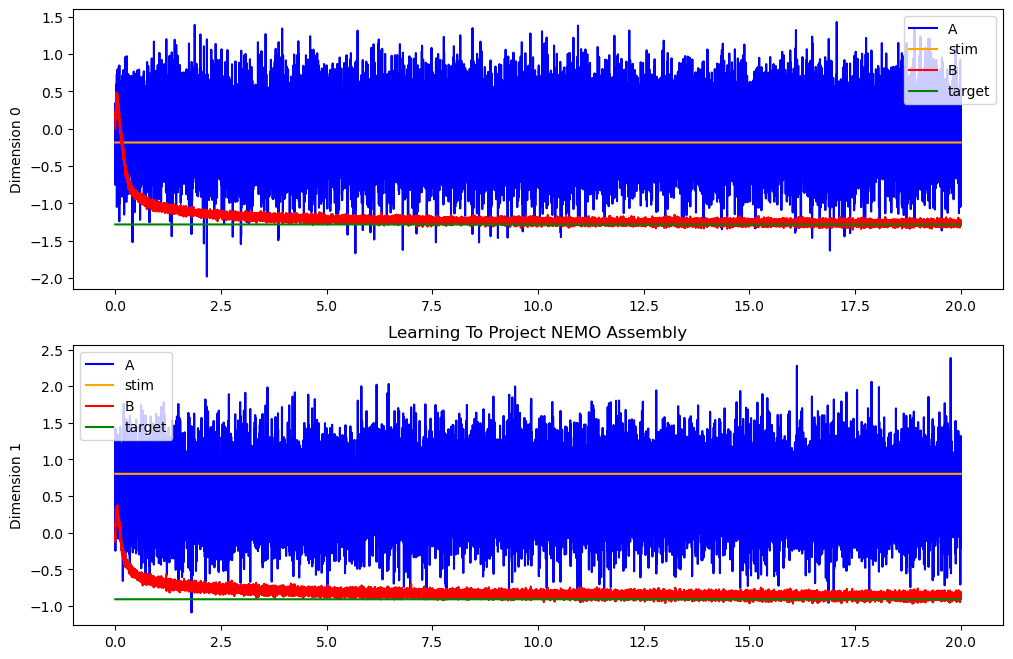

In [321]:
plot_res(sim, [0, 1], dict(A=A_p, stim=stim_p, B=B_p, target=target_p), 20000, colors="blue orange r g".split(), save=True)

In [281]:
rB[[1, 4]]

array([-0.9094577 ,  0.09529173])

In [311]:
def plot_res(sim, dims_to_observe, probes, last_t=20, colors="k b r g".split(), save=False):
    D = len(dims_to_observe)
    plt.figure(figsize=(6*D, 8))
    for i, d in enumerate(dims_to_observe):
        plt.subplot(D, 1, i+1)
        for i, (name, probe) in enumerate(probes.items()):
            plt.plot(sim.trange()[-1*last_t:], sim.data[probe].T[d][-1*last_t:], c=colors[i], label=name)
        plt.ylabel(f"Dimension {d}")
        plt.legend(loc="best")
    plt.title("Learning To Project NEMO Assembly")
    if(save):
        plt.savefig('nengo_project.png')
    plt.show()

In [293]:
dict(stim=stim_p, A=A_p, B=B_p).items()

dict_items([('stim', <Probe at 0x17fbe5b90 of 'output' of <Node (unlabeled) at 0x17fad6250>>), ('A', <Probe at 0x17fb28790 of 'decoded_output' of <Ensemble 'A'>>), ('B', <Probe at 0x17fbb2cd0 of 'decoded_output' of <Ensemble 'B'>>)])